In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import thinning
%matplotlib inline

In [2]:
mask = cv2.imread('mask.png')
mask_g = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

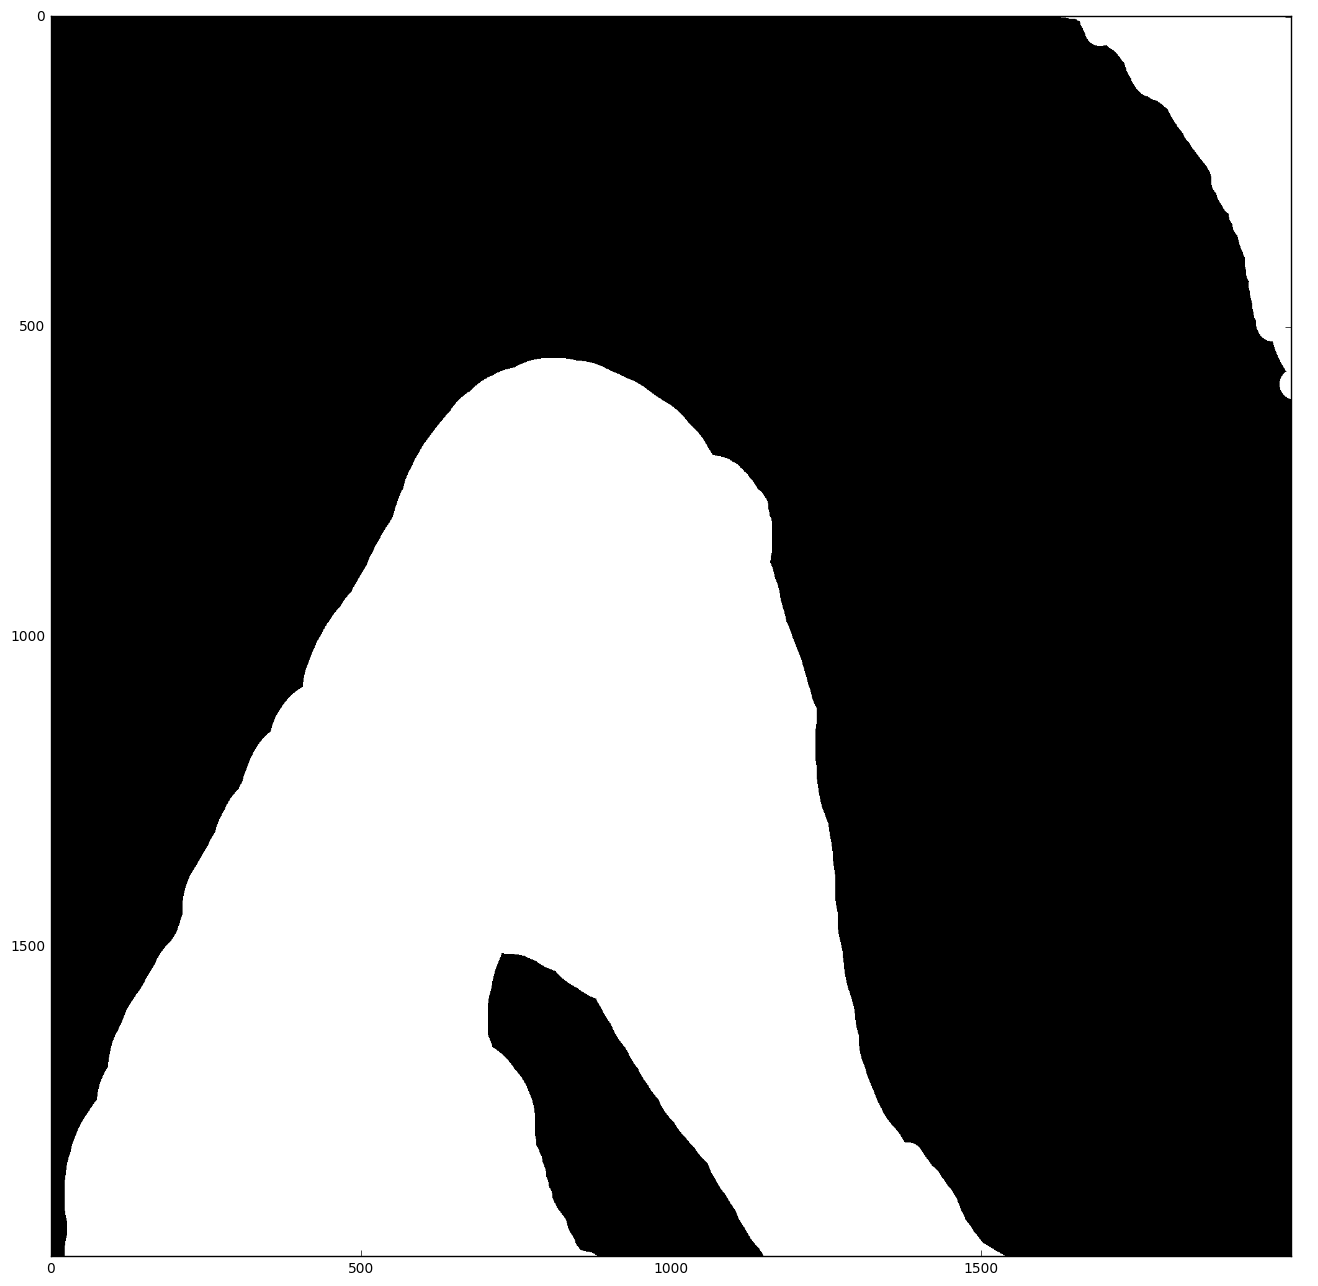

In [3]:
plt.figure(figsize=(16,16))
plt.imshow(mask_g,cmap='gray');

In [4]:
src = cv2.distanceTransform(mask_g, cv2.DIST_L1, cv2.DIST_MASK_PRECISE)

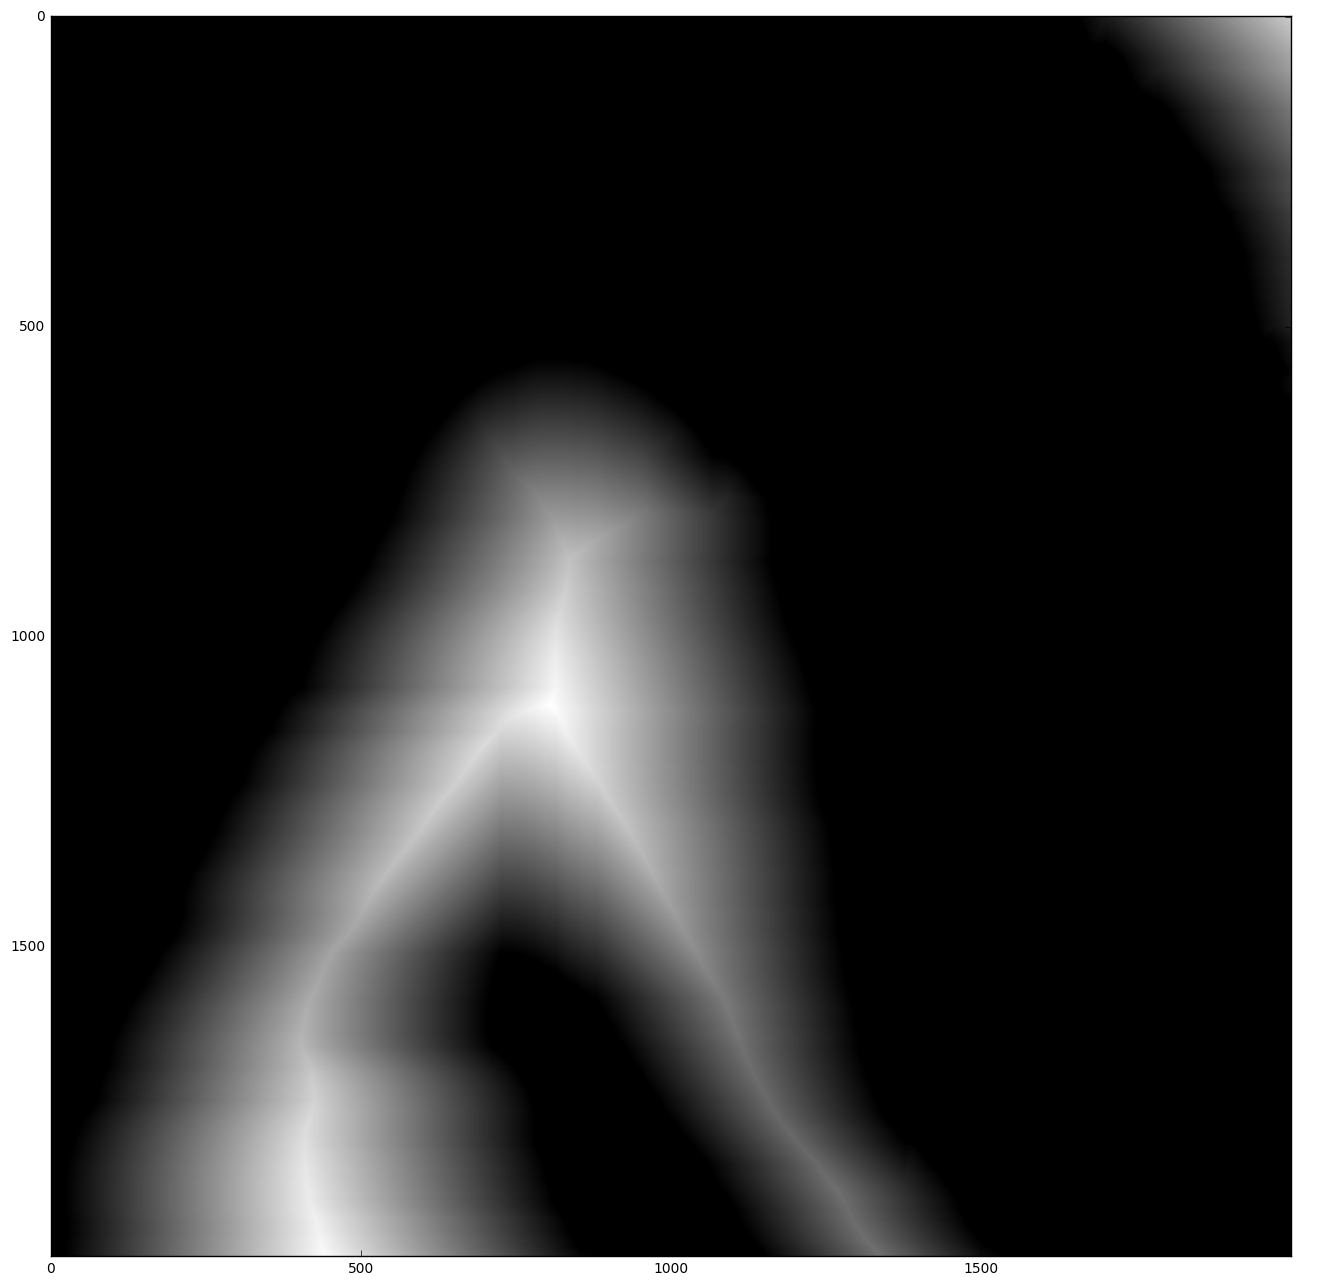

In [5]:
plt.figure(figsize=(16,16))
plt.imshow(src,cmap='gray');

In [162]:
#blur = cv2.bilateralFilter(src,9,75,75)
k = 15
kernel = np.ones((k,k),np.float32)/k**2
blur = cv2.filter2D(src,-1,kernel)

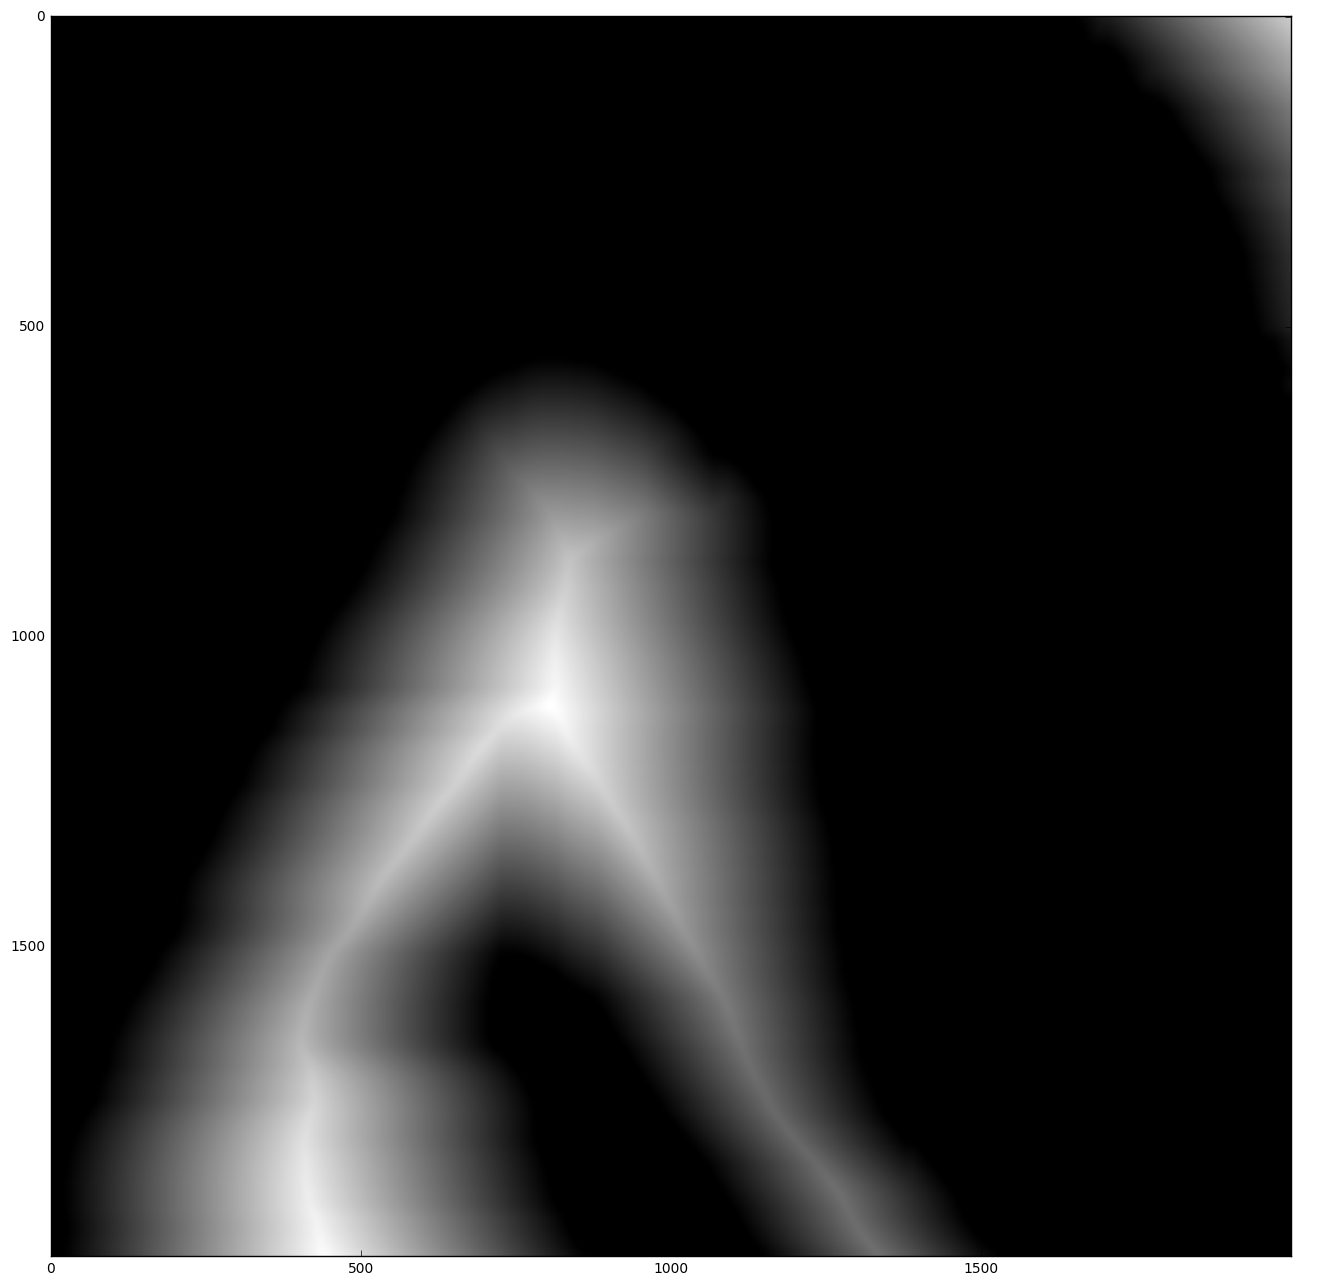

In [163]:
plt.figure(figsize=(16,16))
plt.imshow(blur,cmap='gray');

In [164]:
blurred = True

if blurred:
    img = blur
else:
    img = src

In [165]:
Gx = cv2.Scharr(img, cv2.CV_64F ,1, 0)
Gy = cv2.Scharr(img, cv2.CV_64F ,0, 1)

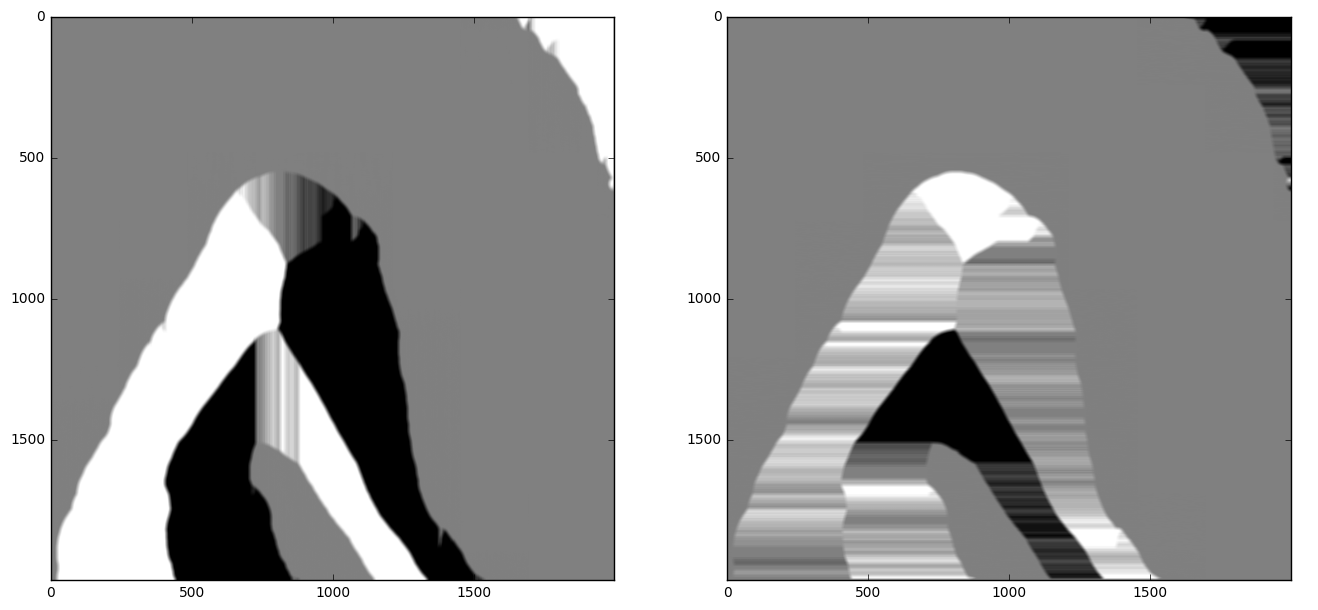

In [166]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(Gx,cmap='gray')
plt.subplot(122)
plt.imshow(Gy,cmap='gray');

In [167]:
#g_mag = np.sqrt(scharrx**2 + scharry**2)
#g_dir = np.arctan2(scharry,scharrx)

#plt.figure(figsize=(16,8))
#plt.subplot(121)
#plt.imshow(g_mag,cmap='gray')
#plt.subplot(122)
#plt.imshow(g_dir,cmap='gray');

In [168]:
def nms(img, gx, gy):
    img_nms = np.zeros_like(img)
    height, width = img.shape
    for x in range(1,width-1):
        for y in range(1,height-1):
            if img[y,x] > 35:
                Gx = gx[y,x]
                Gy = gy[y,x]
                aGx = abs(Gx)
                aGy = abs(Gy)
                if Gx*Gy >= 0:
                    if aGx >= aGy:
                        K1 = 0.5*(img[y,x+1]*(aGx-aGy)+img[y+1,x+1]*aGy)
                        K2 = 0.5*(img[y,x-1]*(aGx-aGy)+img[y-1,x-1]*aGy)
                        if ((aGx*img[y,x] > K1) and ( aGx*img[y,x] > K2 )):
                            img_nms[y,x] = img[y,x]
                    else:
                        K1 = 0.5*(img[y+1,x]*(aGy-aGx)+img[y+1,x+1]*aGx)
                        K2 = 0.5*(img[y-1,x]*(aGy-aGx)+img[y-1,x-1]*aGx)
                        if ((aGy*img[y,x] > K1) and ( aGy*img[y,x] > K2 )):
                            img_nms[y,x] = img[y,x]
                else:
                    if aGx >= aGy:
                        K1 = 0.5*(img[y,x+1]*(aGx-aGy)+img[y-1,x+1]*aGy)
                        K2 = 0.5*(img[y,x-1]*(aGx-aGy)+img[y+1,x-1]*aGy)
                        if ((aGx*img[y,x] > K1) and ( aGx*img[y,x] > K2 )):
                            img_nms[y,x] = img[y,x]
                    else:
                        K1 = 0.5*(img[y-1,x]*(aGy-aGx)+img[y-1,x+1]*aGx)
                        K2 = 0.5*(img[y+1,x]*(aGy-aGx)+img[y+1,x-1]*aGx)
                        if ((aGy*img[y,x] > K1) and ( aGy*img[y,x] > K2 )):
                            img_nms[y,x] = img[y,x]

    return img_nms

In [169]:
test_img = nms(img, Gx, Gy)

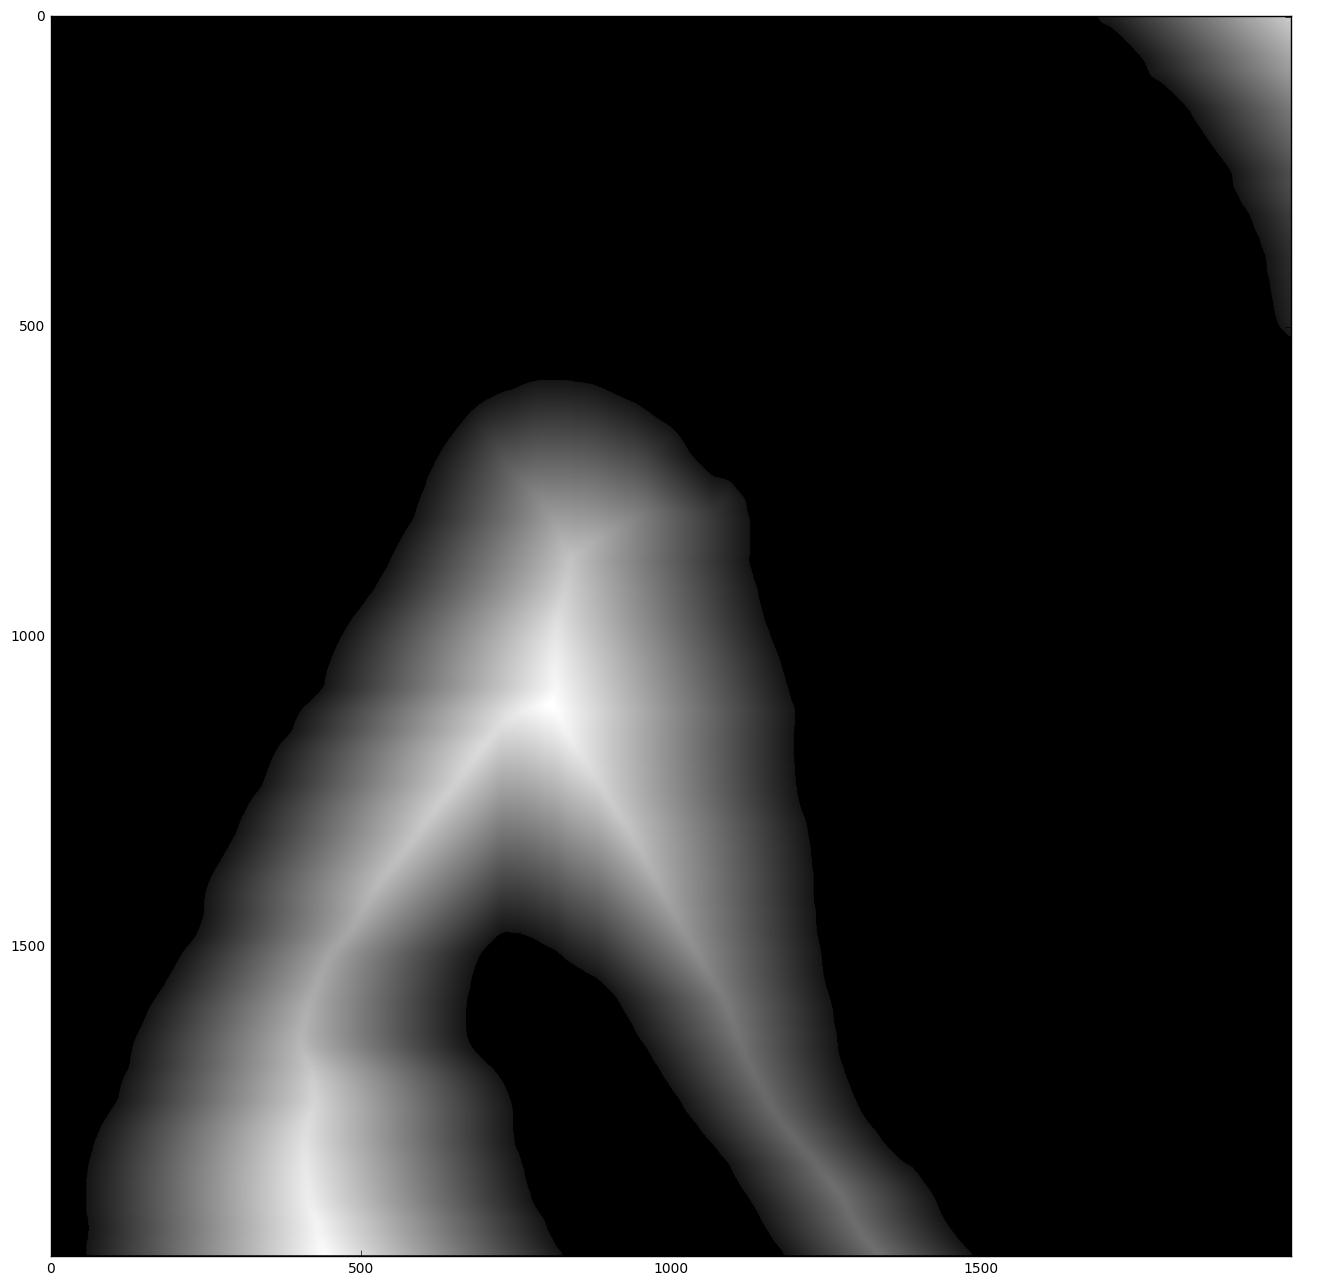

In [170]:
plt.figure(figsize=(16,16))
plt.imshow(test_img,cmap='gray');

In [171]:
distance1 = img
for k in range(20):
    im1 = np.array(distance1 * 255 / np.max(distance1), dtype = np.uint8)
    ret, th = cv2.threshold(im1, 90, 255, cv2.THRESH_BINARY)
    distance2 = cv2.distanceTransform(th, cv2.DIST_L2, 5)
    if np.sum(abs(distance2-distance1)) < 10:
        break
    distance1 = distance2

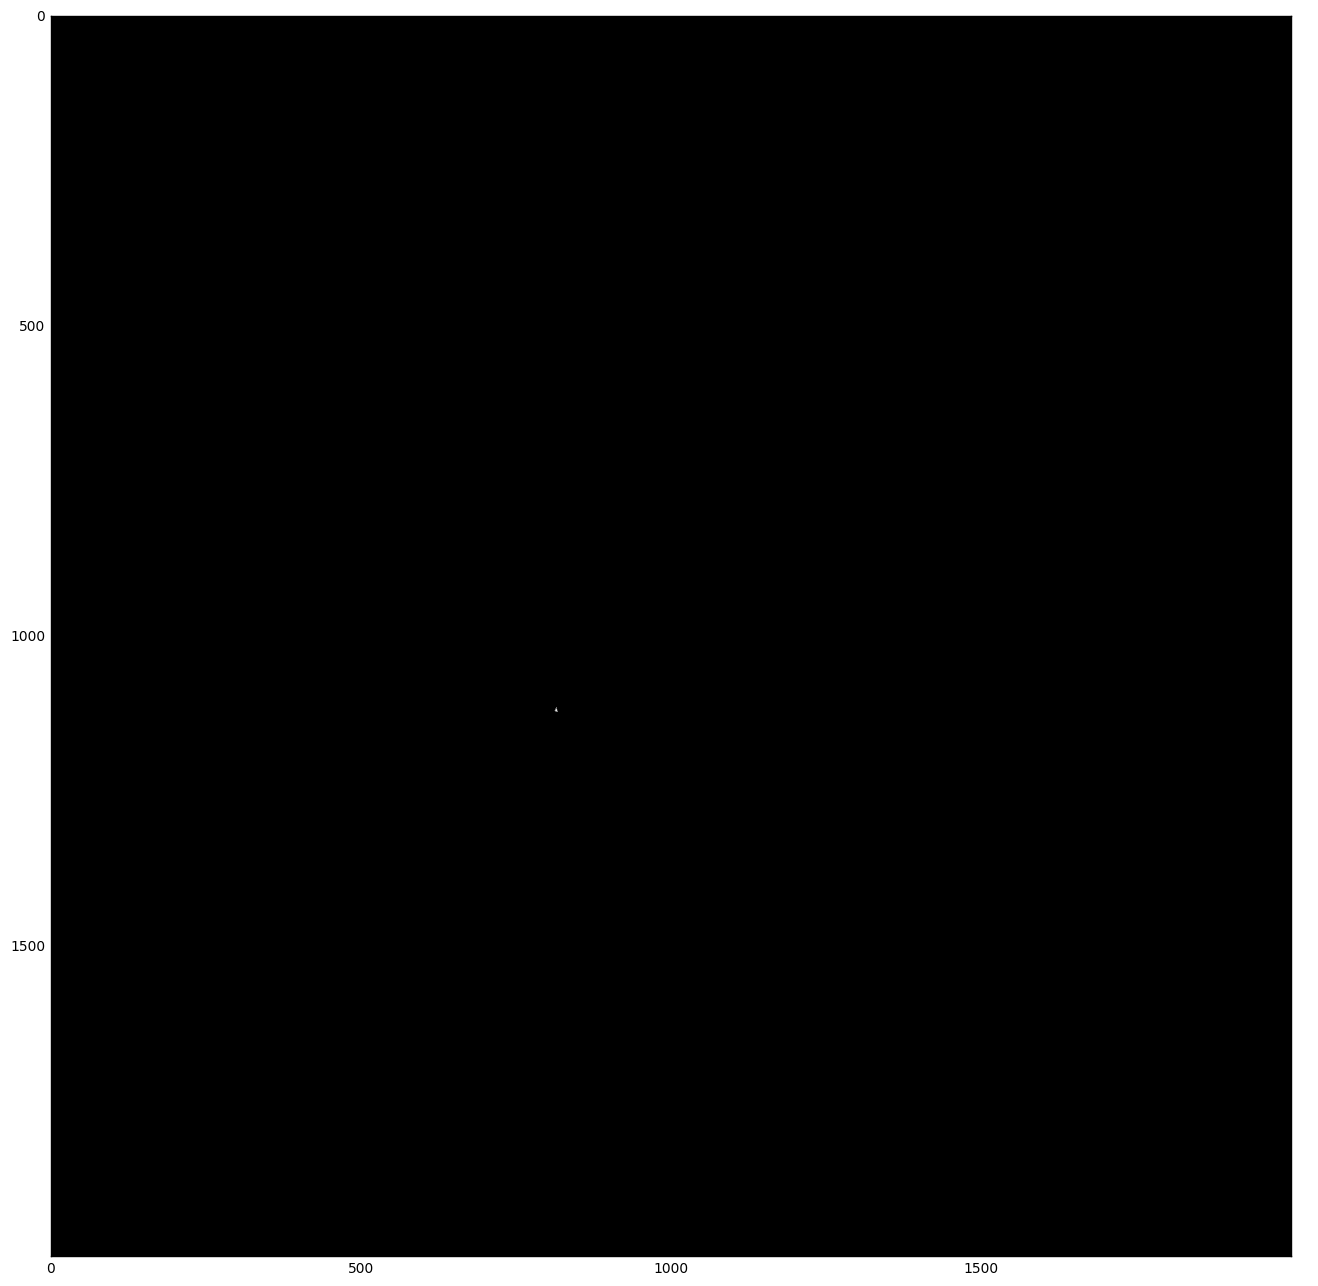

In [172]:
plt.figure(figsize=(16,16))
plt.imshow(distance2,cmap='gray');